In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Spoof browser headers
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0 Safari/537.36"
}

url = "https://cwur.org/2024.php"
response = requests.get(url, headers=headers)

# Check status code again
print("Status Code:", response.status_code)


Status Code: 200


In [14]:
from bs4 import BeautifulSoup

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Preview the HTML structure (optional)
print(soup.prettify()[:1000])  # Shows first 1000 characters


<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <!-- The above 3 meta tags *must* come first in the head; any other head content must come *after* these tags -->
  <meta content="Discover the world's top universities and best colleges for 2024. Explore the Global 2000 list by the Center for World University Rankings (CWUR)." name="description"/>
  <meta content="ranking, rankings, university, universities, college, colleges, 2025, 2023, world, top, best, global, Ranking universitario mundial, Classement mondial des universités , Weltweites Universitätsranking, Zentrum für weltweite Universitätsrankings , דירוג האוניברסיטאות העולמי, המרכז לדירוג האוניברסיטאות העולמי, 세계 대학순위, が世界の大学トップ, 世界大學排名中心, 세계대학랭킹센터,世界大学ランキングセンター, Ranking mundial universitário, Рейтинг университетов мира , разработки рейтинга университетов мира, مركز ,تصنيف الجامعات 

In [15]:
# Find the first table in the page (which contains the university rankings)
table = soup.find('table')

# Extract column headers from the <th> elements
headers = [th.text.strip() for th in table.find_all('th')]

# Show the headers
print(headers)


['World Rank', 'Institution', 'Location', 'National Rank', 'Education Rank', 'Employability Rank', 'Faculty Rank', 'Research Rank', 'Score']


In [16]:
# Initialize list to store each row of data
rows = []

# Loop through all <tr> tags, skipping the first one (which is the header)
for tr in table.find_all('tr')[1:]:
    cols = tr.find_all('td')
    row = [td.text.strip() for td in cols]
    if row:  # Only add non-empty rows
        rows.append(row)

# Preview the first 3 rows
for r in rows[:3]:
    print(r)


['1Top\xa00.1%', 'Harvard University', 'USA', '1', '1', '1', '1', '1', '100']
['2Top\xa00.1%', 'Massachusetts Institute of Technology', 'USA', '2', '4', '12', '2', '12', '96.8']
['3Top\xa00.1%', 'Stanford University', 'USA', '3', '10', '4', '3', '2', '95.2']


In [17]:
import pandas as pd

# Convert rows into a DataFrame using the headers
df = pd.DataFrame(rows, columns=headers)

# Show the first few rows
df.head()


,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University,USA,1,1,1,1,1,100
1,2Top 0.1%,Massachusetts Institute of Technology,USA,2,4,12,2,12,96.8
2,3Top 0.1%,Stanford University,USA,3,10,4,3,2,95.2
3,4Top 0.1%,University of Cambridge,United Kingdom,1,3,26,4,14,94.1
4,5Top 0.1%,University of Oxford,United Kingdom,2,7,28,9,6,93.3


In [18]:
# List of columns to convert
numeric_cols = [
    'World Rank',
    'National Rank',
    'Education Rank',
    'Employability Rank',
    'Faculty Rank',
    'Research Rank',
    'Score'
]

# Convert each column to numeric
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Confirm data types and preview cleaned data
print(df.dtypes)
df.head()


World Rank            float64
Institution            object
Location               object
National Rank           int64
Education Rank        float64
Employability Rank    float64
Faculty Rank          float64
Research Rank         float64
Score                 float64
dtype: object


,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,NaN,Harvard University,USA,1,1.0,1.0,1.0,1.0,100.0
1,NaN,Massachusetts Institute of Technology,USA,2,4.0,12.0,2.0,12.0,96.8
2,NaN,Stanford University,USA,3,10.0,4.0,3.0,2.0,95.2
3,NaN,University of Cambridge,United Kingdom,1,3.0,26.0,4.0,14.0,94.1
4,NaN,University of Oxford,United Kingdom,2,7.0,28.0,9.0,6.0,93.3


In [19]:
# Save the cleaned CWUR 2024 university rankings
df.to_csv("cwur_2024_university_rankings.csv", index=False)
print("✅ File saved as 'cwur_2024_university_rankings.csv'")


✅ File saved as 'cwur_2024_university_rankings.csv'


NameError: name 'bar_w' is not defined

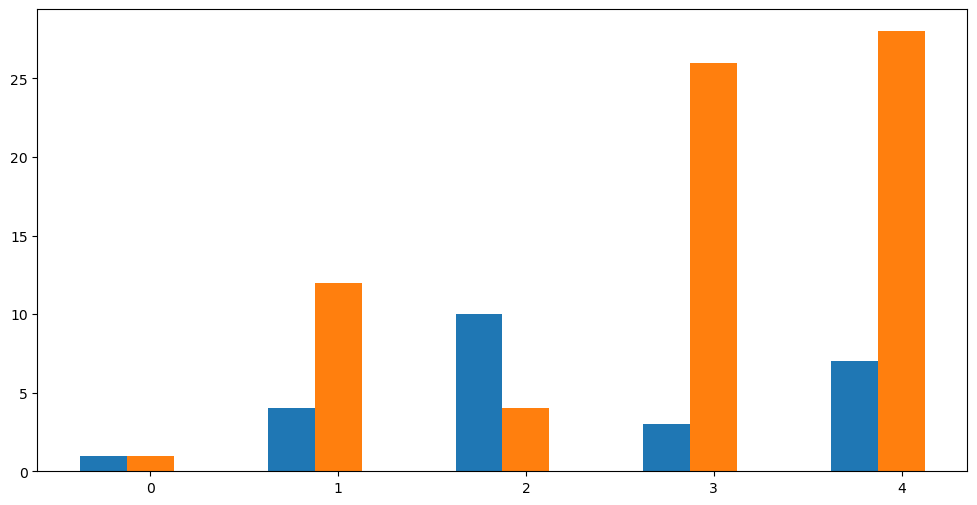

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (based on your screenshot)
data = {
    'Institution': [
        'Harvard University',
        'MIT',
        'Stanford',
        'Cambridge',
        'Oxford'
    ],
    'Education Rank': [1, 4, 10, 3, 7],
    'Employability Rank': [1, 12, 4, 26, 28],
    'Faculty Rank': [1, 2, 3, 5, 6]  # Placeholder values; update if needed
}

df = pd.DataFrame(data)

# Set bar width and position
bar_width = 0.25
x = range(len(df))

plt.figure(figsize=(12, 6))

# Plot each rank category
plt.bar([i - bar_width for i in x], df['Education Rank'], width=bar_width, label='Education')
plt.bar(x, df['Employability Rank'], width=bar_width, label='Employability')
plt.bar([i + bar_width for i in x], df['Faculty Rank'], width=bar_w)


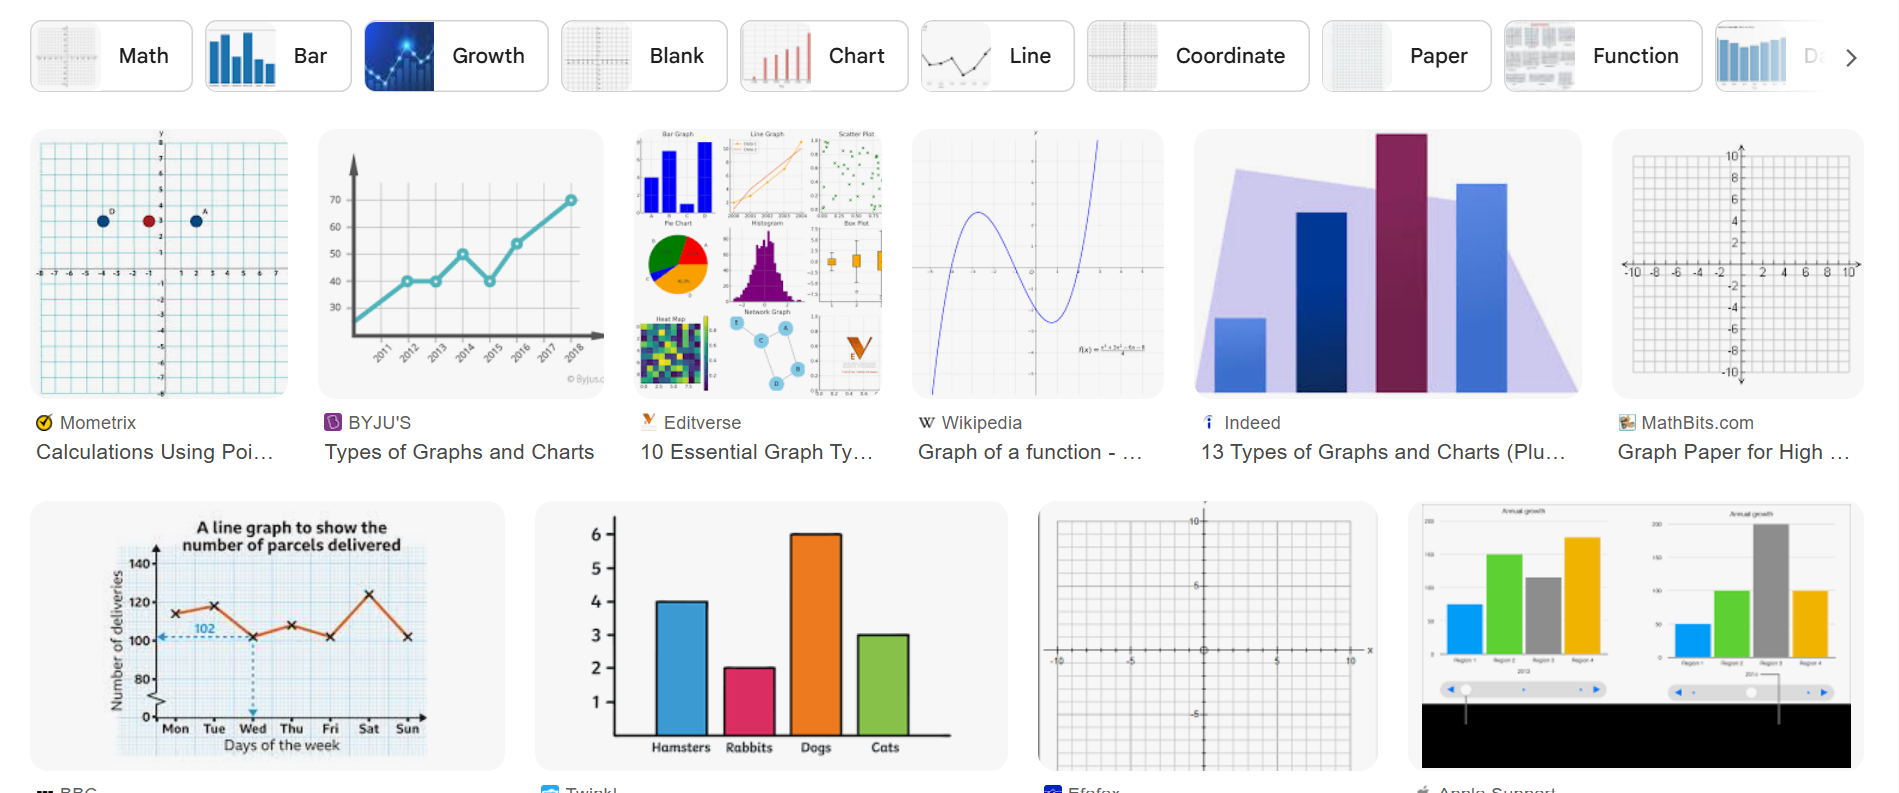

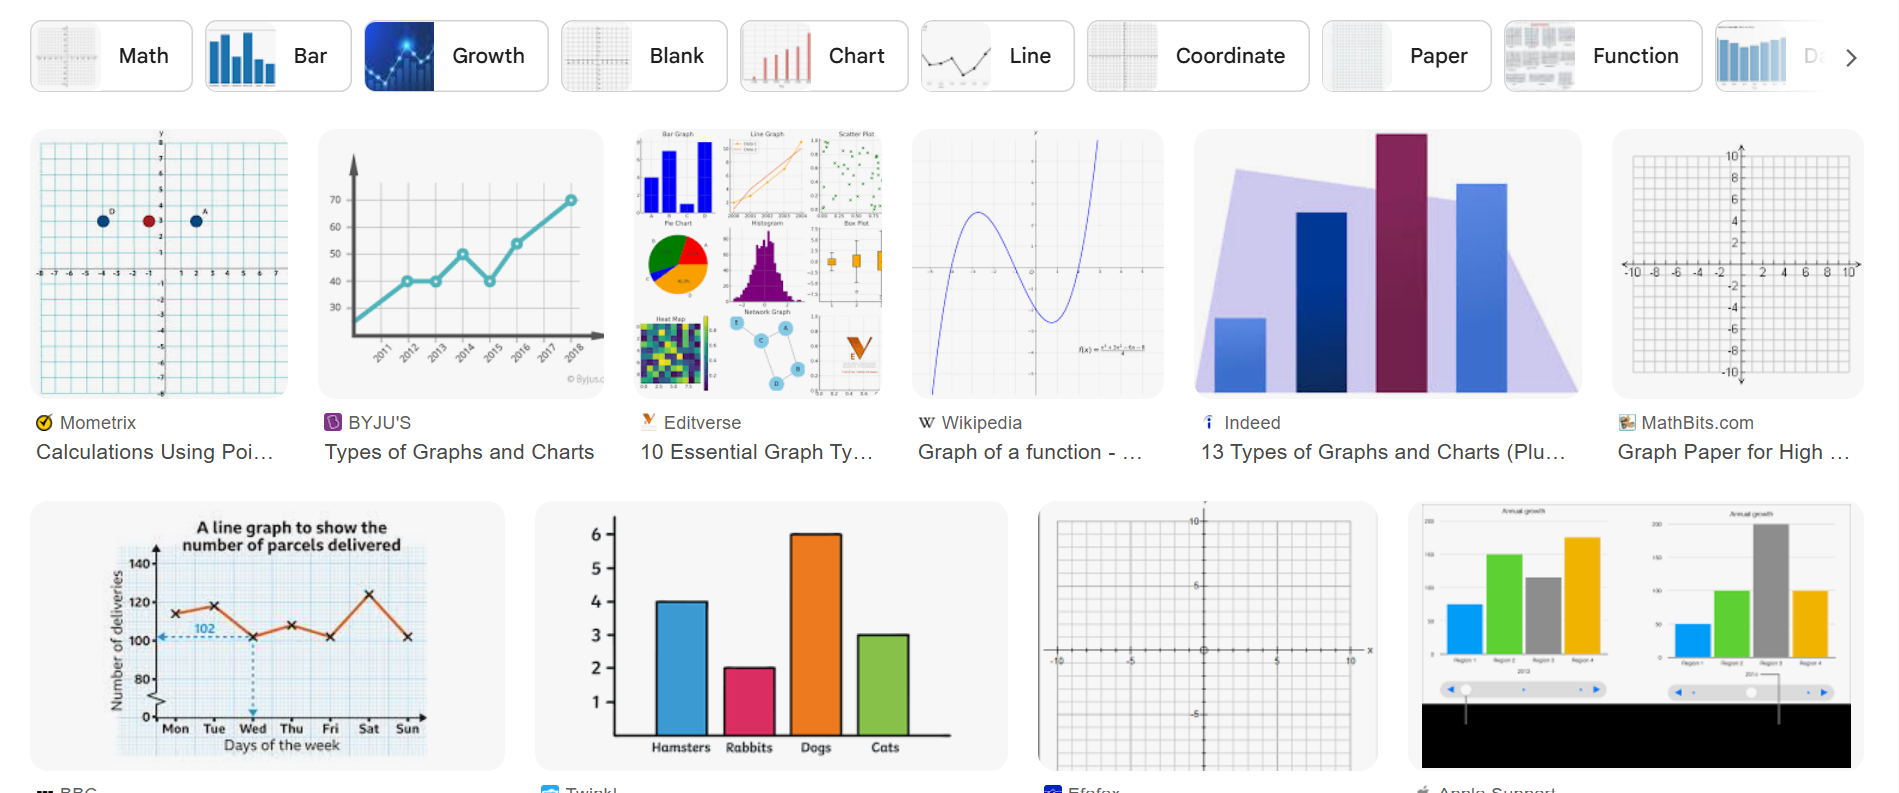

VVVV